# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ikhsandi Saktiawan
- **Email:** ikhsandisaktiawan14@gmail.com
- **ID Dicoding:** ikhsandi_saktiwan

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda harian?
- Bagaimana karakteristik hari dengan jumlah peminjaman sepeda harian tinggi berdasarkan data harian dan bagaimana pola peminjaman sepeda dalam jam-jam tertentu pada hari-hari tersebut berdasarkan data per jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
days_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike-Sharing/day.csv')
days_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,Recency,Frequency,Monetary,RFM_Segment,season_group,weather_group,rental_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,730,985,985,Low-Low-Low,Spring,Moderate Weather,Low
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,131,670,801,729,801,801,Low-Low-Low,Spring,Moderate Weather,Low
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,120,1229,1349,728,1349,1349,Low-Low-Low,Spring,Good Weather,Medium
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,108,1454,1562,727,1562,1562,Low-Low-Low,Spring,Good Weather,Medium
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,82,1518,1600,726,1600,1600,Low-Low-Low,Spring,Good Weather,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,247,1867,2114,4,2114,2114,High-Low-Low,Spring,Moderate Weather,Medium
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,644,2451,3095,3,3095,3095,High-Low-Low,Spring,Moderate Weather,High
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,159,1182,1341,2,1341,1341,High-Low-Low,Spring,Moderate Weather,Medium
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,364,1432,1796,1,1796,1796,High-Low-Low,Spring,Good Weather,Medium


In [4]:
hours_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike-Sharing/hour.csv')
hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dataset harian mencakup 2 tahun, karena data memiliki 731 baris yang mana itu 731 hari = 2 tahun (2011 - 2012)
- Dataset per jam mencakup data per jam selama 2 tahun

### Assessing Data

###Menilai data days_df

In [5]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        731 non-null    int64  
 1   dteday         731 non-null    object 
 2   season         731 non-null    int64  
 3   yr             731 non-null    int64  
 4   mnth           731 non-null    int64  
 5   holiday        731 non-null    int64  
 6   weekday        731 non-null    int64  
 7   workingday     731 non-null    int64  
 8   weathersit     731 non-null    int64  
 9   temp           731 non-null    float64
 10  atemp          731 non-null    float64
 11  hum            731 non-null    float64
 12  windspeed      731 non-null    float64
 13  casual         731 non-null    int64  
 14  registered     731 non-null    int64  
 15  cnt            731 non-null    int64  
 16  Recency        731 non-null    int64  
 17  Frequency      731 non-null    int64  
 18  Monetary  

In [6]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Recency,Frequency,Monetary
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,365.000000,4504.348837,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,211.165812,1937.211452,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000,22.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,182.500000,3152.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,365.000000,4548.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,547.500000,5956.000000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,730.000000,8714.000000,8714.000000


In [8]:
# Cek jumlah hari unik di days_df
print("Jumlah hari unik di days_df:", days_df['dteday'].nunique())

Jumlah hari unik di days_df: 731


In [9]:
# Cek nilai unik di kolom kategorikal
print("Nilai unik di season:", days_df['season'].unique())
print("Nilai unik di weathersit:", days_df['weathersit'].unique())
print("Nilai unik di weekday:", days_df['weekday'].unique())

Nilai unik di season: [1 2 3 4]
Nilai unik di weathersit: [2 1 3]
Nilai unik di weekday: [6 0 1 2 3 4 5]


###Menilai data hours_df

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Cek jumlah jam unik di hours_df
print("Jumlah jam unik di hours_df:", hours_df['hr'].nunique())

Jumlah jam unik di hours_df: 24


In [14]:
# Cek nilai unik di kolom kategorikal
print("Nilai unik di season:", hours_df['season'].unique())
print("Nilai unik di weathersit:", hours_df['weathersit'].unique())
print("Nilai unik di weekday:", hours_df['weekday'].unique())

Nilai unik di season: [1 2 3 4]
Nilai unik di weathersit: [1 2 3 4]
Nilai unik di weekday: [6 0 1 2 3 4 5]


**Insight:**
- days_df:
    - kolom ```dteday``` tipe datanya seharusnya bertipe ```datetime``` bukan ```object```
    - Kolom ```season```, ```yr```, ```mnth```, ```holiday```, ```weekday```, ```workingday```, dan ```weathersit``` tipe datanya seharusnya bertipe ```category``` bukan ```int64``` karena kolom ini mewakili kategori (misalnya, season dengan nilai 1-4, weekday dengan nilai 0-6). Menggunakan tipe int64 dapat menimbulkan bias interpretasi karena Python akan menganggapnya sebagai numerik, bukan kategori
    - Tidak ada missing values (semua kolom memiliki 731 non-null entries).
    - Tidak ada duplikasi data
    - Tidak ada inaccurate data

- hours_df:
    - kolom ```dteday``` tipe datanya seharusnya bertipe ```datetime``` bukan ```object```
    -  Kolom ```season```, ```yr```, ```mnth```, ```holiday```, ```weekday```, ```workingday```, dan ```weathersit``` tipe datanya seharusnya bertipe ```category``` bukan ```int64``` karena kolom ini mewakili kategori (misalnya, season dengan nilai 1-4, weekday dengan nilai 0-6). Menggunakan tipe int64 dapat menimbulkan bias interpretasi karena Python akan menganggapnya sebagai numerik, bukan kategori
    - Tidak ada missing values (semua kolom memiliki 731 non-null entries).
    - Tidak ada duplikasi data
    - Tidak ada inaccurate data

### Cleaning Data

###Membersihkan Data days_df & hours_df

In [15]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
days_df[categorical_columns] = days_df[categorical_columns].astype('category')
hours_df[categorical_columns] = hours_df[categorical_columns].astype('category')

In [16]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    category      
 3   yr             731 non-null    category      
 4   mnth           731 non-null    category      
 5   holiday        731 non-null    category      
 6   weekday        731 non-null    category      
 7   workingday     731 non-null    category      
 8   weathersit     731 non-null    category      
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  cnt            731 non-

In [17]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,Recency,Frequency,Monetary,RFM_Segment,season_group,weather_group,rental_group
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731,731
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,4,3,3
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,High-High-High,Fall,Good Weather,High
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,188,188,463,559
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,...,848.176471,3656.172367,4504.348837,365.000000,4504.348837,4504.348837,NaN,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,...,2.000000,20.000000,22.000000,0.000000,22.000000,22.000000,NaN,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,...,315.500000,2497.000000,3152.000000,182.500000,3152.000000,3152.000000,NaN,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,...,713.000000,3662.000000,4548.000000,365.000000,4548.000000,4548.000000,NaN,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,...,1096.000000,4776.500000,5956.000000,547.500000,5956.000000,5956.000000,NaN,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,...,3410.000000,6946.000000,8714.000000,730.000000,8714.000000,8714.000000,NaN,NaN,NaN,NaN


In [19]:
weather_stats = days_df.groupby('weathersit')['cnt'].describe()
weather_stats

<ipython-input-19-3d76b1cb7308>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = days_df.groupby('weathersit')['cnt'].describe()


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


In [20]:
correlation_matrix = days_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
correlation_matrix['cnt']

,cnt
temp,0.627494
atemp,0.631066
hum,-0.100659
windspeed,-0.234545
cnt,1.000000


In [21]:
# identifikasi hari dengan jumlah peminjaman yang tinggi
high_rental_threshold = days_df['cnt'].quantile(0.9)
high_rental_days = days_df[days_df['cnt'] > high_rental_threshold]
high_rental_days

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,Recency,Frequency,Monetary,RFM_Segment,season_group,weather_group,rental_group
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,...,3155,4681,7836,289,7836,7836,Medium-High-High,Spring,Moderate Weather,High
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,...,2469,5893,8362,283,8362,8362,Medium-High-High,Summer,Moderate Weather,High
469,470,2012-04-14,2,1,4,0,6,0,1,0.495000,...,2795,4665,7460,261,7460,7460,Medium-High-High,Summer,Good Weather,High
497,498,2012-05-12,2,1,5,0,6,0,1,0.564167,...,2622,4807,7429,233,7429,7429,High-High-High,Summer,Good Weather,High
501,502,2012-05-16,2,1,5,0,3,1,1,0.636667,...,991,6433,7424,229,7424,7424,High-High-High,Summer,Good Weather,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,662,2012-10-23,4,1,10,0,2,1,1,0.544167,...,841,6625,7466,69,7466,7466,High-High-High,Winter,Good Weather,High
662,663,2012-10-24,4,1,10,0,3,1,1,0.587500,...,795,6898,7693,68,7693,7693,High-High-High,Winter,Good Weather,High
663,664,2012-10-25,4,1,10,0,4,1,2,0.550000,...,875,6484,7359,67,7359,7359,High-High-High,Winter,Moderate Weather,High
664,665,2012-10-26,4,1,10,0,5,1,2,0.545833,...,1182,6262,7444,66,7444,7444,High-High-High,Winter,Moderate Weather,High


In [22]:
# Analisis Karakteristik Hari dengan Jumlah Peminjaman Tinggi
# Kolom numerik
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']

# Kolom kategorikal
categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']

# Hitung rata-rata untuk kolom numerik
numeric_characteristics = high_rental_days[numeric_cols].mean()

# Hitung frekuensi tertinggi (modus) untuk kolom kategorikal
categorical_characteristics = high_rental_days[categorical_cols].apply(lambda x: x.value_counts().idxmax())

# gabung hasil analisis
high_rental_characteristics = pd.concat([numeric_characteristics, categorical_characteristics], axis=0)
high_rental_characteristics

,0
temp,0.619486
atemp,0.585327
hum,0.591849
windspeed,0.162028
season,3.000000
holiday,0.000000
weekday,3.000000
workingday,1.000000
weathersit,1.000000


### Analisis Pola Peminjaman Dalam Sehari pada Hari-Hari dengan Jumlah Peminjaman Tinggi dari hours_df

In [23]:
# Filter Data Per Jam untuk Hari-Hari dengan Jumlah Peminjaman Tinggi
high_rental_dates = high_rental_days['dteday'].unique()
#filter hours_df untuk mendapatkan data per jam pada hari-hari tersebut.
high_rental_hours = hours_df[hours_df['dteday'].isin(high_rental_dates)]
high_rental_hours

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10461,10462,2012-03-17,1,1,3,0,0,6,0,2,0.44,0.4394,0.94,0.0896,13,87,100
10462,10463,2012-03-17,1,1,3,1,0,6,0,2,0.44,0.4394,0.94,0.0000,12,57,69
10463,10464,2012-03-17,1,1,3,2,0,6,0,2,0.44,0.4394,0.88,0.0000,10,32,42
10464,10465,2012-03-17,1,1,3,3,0,6,0,2,0.44,0.4394,0.88,0.0000,2,24,26
10465,10466,2012-03-17,1,1,3,4,0,6,0,2,0.42,0.4242,0.94,0.0000,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15854,15855,2012-10-27,4,1,10,19,0,6,0,2,0.52,0.5000,0.72,0.2239,67,233,300
15855,15856,2012-10-27,4,1,10,20,0,6,0,2,0.52,0.5000,0.72,0.2239,58,238,296
15856,15857,2012-10-27,4,1,10,21,0,6,0,2,0.52,0.5000,0.72,0.2239,49,160,209
15857,15858,2012-10-27,4,1,10,22,0,6,0,2,0.52,0.5000,0.72,0.2537,41,116,157


In [24]:
# Analisis Pola Peminjaman Dalam Sehari
hourly_rental_stats = high_rental_hours.groupby('hr')['cnt'].describe()
hourly_rental_stats

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,73.0,84.246575,45.502986,17.0,52.0,66.0,105.0,207.0
1,73.0,50.315068,41.470832,8.0,21.0,29.0,76.0,146.0
2,73.0,32.041096,32.221214,3.0,11.0,16.0,43.0,122.0
3,73.0,16.219178,14.714172,1.0,6.0,9.0,26.0,56.0
4,73.0,9.301370,4.389650,2.0,6.0,8.0,11.0,28.0
5,73.0,34.232877,15.327463,6.0,19.0,38.0,43.0,66.0
6,73.0,129.890411,63.985363,16.0,47.0,159.0,178.0,211.0
7,73.0,371.506849,197.296388,35.0,86.0,474.0,516.0,596.0
8,73.0,583.013699,257.671814,128.0,218.0,707.0,761.0,839.0


**Insight:**
- Berdasarkan analisis statistik deskriptif dan korelasi, kita dapat menyimpulkan bahwa:
  - Kondisi Cuaca yang Baik Meningkatkan Jumlah Peminjaman:
      - Hari-hari dengan kondisi cuaca cerah atau sedikit awan memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan hari-hari berawan atau hujan ringan, dan jauh lebih tinggi dibandingkan dengan hari-hari hujan lebat atau salju.
  - Suhu Memiliki Pengaruh Positif yang Kuat:
      - Semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Hal ini mungkin karena cuaca yang hangat membuat aktivitas luar ruangan seperti bersepeda menjadi lebih nyaman.
  - Kecepatan Angin Memiliki Pengaruh Negatif yang Sedang:
      - Kecepatan angin yang lebih tinggi cenderung mengurangi jumlah peminjaman sepeda, meskipun pengaruhnya tidak sekuat suhu.
  - Kelembaban Memiliki Pengaruh Negatif yang Lemah:
      - Meskipun kelembaban memiliki korelasi negatif dengan jumlah peminjaman sepeda, pengaruhnya relatif kecil.

- Karakteristik Hari dengan Jumlah Peminjaman Tinggi:
  - Hari-hari dengan jumlah peminjaman tinggi biasanya terjadi pada musim panas, bukan hari libur, hari kerja, kondisi cuaca baik, suhu dan suhu yang dirasakan tinggi, kelembaban rendah, dan kecepatan angin lemah.
  
- Pola Peminjaman Dalam Sehari:
  - Pada hari-hari dengan jumlah peminjaman tinggi, jumlah peminjaman sepeda cenderung lebih tinggi pada jam-jam tertentu, misalnya saat jam pulang kerja atau waktu-waktu rekreasi lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda harian?

#### Visualisasi Distribusi Jumlah Peminjaman per Kondisi Cuaca

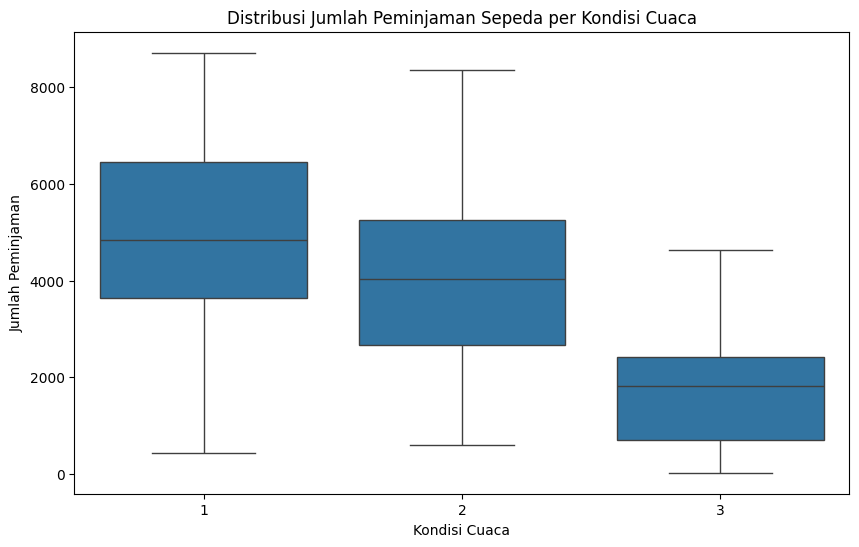

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=days_df)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

####Visualisasi Korelasi antara Variabel Cuaca dan Jumlah Peminjaman

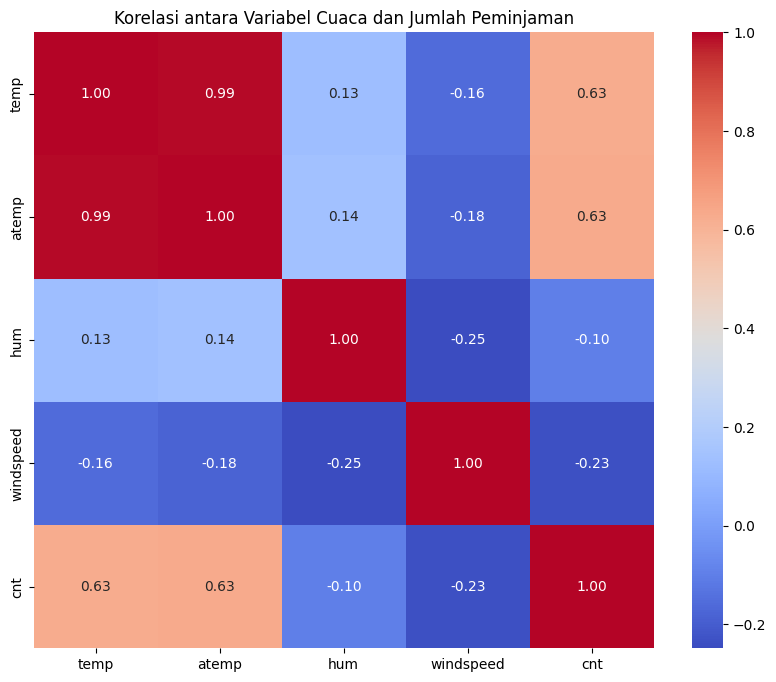

In [26]:
# Hitung matriks korelasi
correlation_matrix = days_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Heatmap untuk korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Cuaca dan Jumlah Peminjaman')
plt.show()

### Pertanyaan 2: Bagaimana karakteristik hari dengan jumlah peminjaman sepeda harian tinggi berdasarkan data harian dan bagaimana pola peminjaman sepeda dalam jam-jam tertentu pada hari-hari tersebut berdasarkan data per jam?

####Karakteristik Hari dengan Jumlah Peminjaman Tinggi

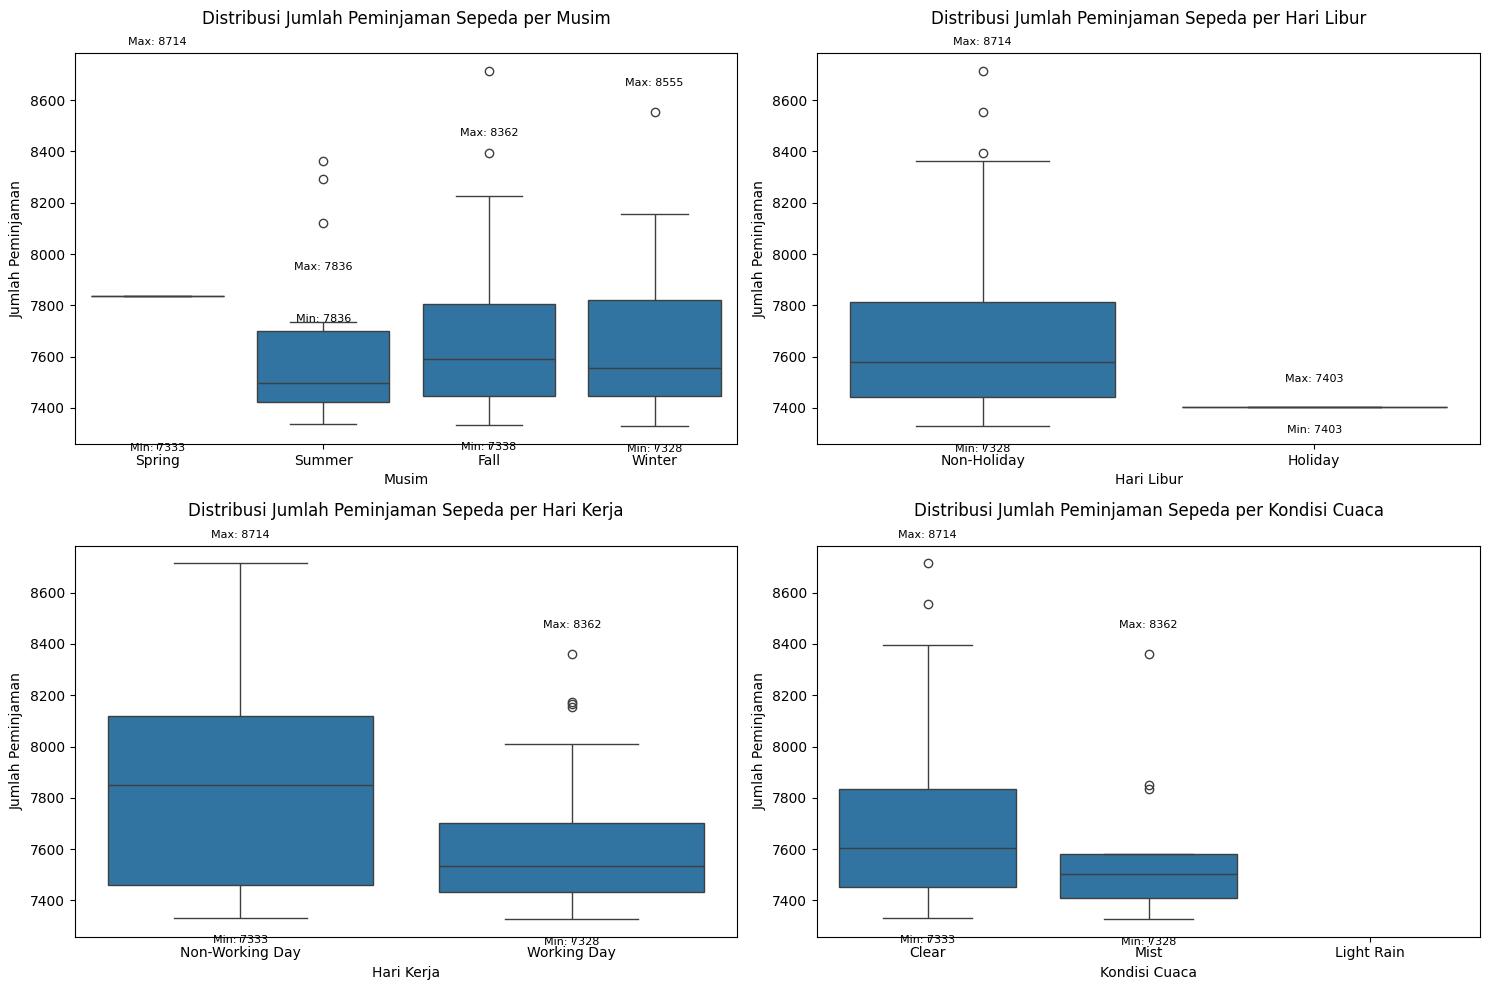

In [27]:
# Mengubah format data kategori menjadi lebih informatif
high_rental_days = high_rental_days.copy()  # salinan DataFrame

high_rental_days.loc[:, 'season_group'] = high_rental_days['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
high_rental_days.loc[:, 'holiday_group'] = high_rental_days['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
high_rental_days.loc[:, 'workingday_group'] = high_rental_days['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
high_rental_days.loc[:, 'weathersit_group'] = high_rental_days['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
})

# Visualisasi Distribusi Jumlah Peminjaman per Karakteristik Hari
plt.figure(figsize=(15, 10))

# Boxplot untuk distribusi jumlah peminjaman per musim
plt.subplot(2, 2, 1)
sns.boxplot(x='season_group', y='cnt', data=high_rental_days)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Musim\n')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')

for i in range(len(high_rental_days['season_group'].unique())):
    max_val = high_rental_days.groupby('season_group',observed=False)['cnt'].max().iloc[i]
    min_val = high_rental_days.groupby('season_group',observed=False)['cnt'].min().iloc[i]
    plt.text(i, max_val + 100, f"Max: {max_val:.0f}", ha='center', fontsize=8)
    plt.text(i, min_val - 100, f"Min: {min_val:.0f}", ha='center', fontsize=8)

# Boxplot untuk distribusi jumlah peminjaman per hari libur
plt.subplot(2, 2, 2)
sns.boxplot(x='holiday_group', y='cnt', data=high_rental_days)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Hari Libur\n')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Peminjaman')

for i in range(len(high_rental_days['holiday_group'].unique())):
    max_val = high_rental_days.groupby('holiday_group',observed=False)['cnt'].max().iloc[i]
    min_val = high_rental_days.groupby('holiday_group',observed=False)['cnt'].min().iloc[i]
    plt.text(i, max_val + 100, f"Max: {max_val:.0f}", ha='center', fontsize=8)
    plt.text(i, min_val - 100, f"Min: {min_val:.0f}", ha='center', fontsize=8)

# Boxplot untuk distribusi jumlah peminjaman per hari kerja
plt.subplot(2, 2, 3)
sns.boxplot(x='workingday_group', y='cnt', data=high_rental_days)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Hari Kerja\n')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Peminjaman')

for i in range(len(high_rental_days['workingday_group'].unique())):
    max_val = high_rental_days.groupby('workingday_group',observed=False)['cnt'].max().iloc[i]
    min_val = high_rental_days.groupby('workingday_group',observed=False)['cnt'].min().iloc[i]
    plt.text(i, max_val + 100, f"Max: {max_val:.0f}", ha='center', fontsize=8)
    plt.text(i, min_val - 100, f"Min: {min_val:.0f}", ha='center', fontsize=8)

# Boxplot untuk distribusi jumlah peminjaman per kondisi cuaca
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit_group', y='cnt', data=high_rental_days)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Kondisi Cuaca\n')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')

for i in range(len(high_rental_days['weathersit_group'].unique())):
    max_val = high_rental_days.groupby('weathersit_group',observed=False)['cnt'].max().iloc[i]
    min_val = high_rental_days.groupby('weathersit_group',observed=False)['cnt'].min().iloc[i]
    plt.text(i, max_val + 100, f"Max: {max_val:.0f}", ha='center', fontsize=8)
    plt.text(i, min_val - 100, f"Min: {min_val:.0f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

####Pola Peminjaman Dalam Sehari pada Hari-Hari dengan Jumlah Peminjaman Tinggi

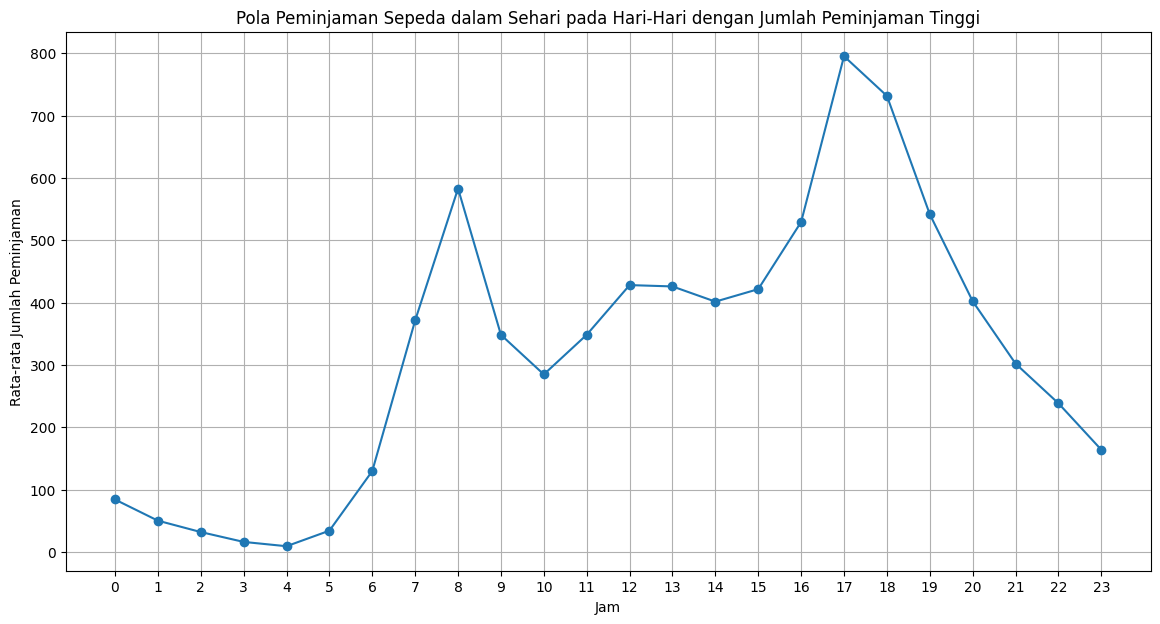

In [28]:
# Rerata jumlah peminjaman per jam pada hari-hari dengan jumlah peminjaman tinggi
hourly_rental_avg = high_rental_hours.groupby('hr')['cnt'].mean()

# Line plot untuk pola peminjaman per jam
plt.figure(figsize=(14, 7))
hourly_rental_avg.plot(kind='line', marker='o')
plt.title('Pola Peminjaman Sepeda dalam Sehari pada Hari-Hari dengan Jumlah Peminjaman Tinggi')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1:
  - **Kondisi Cuaca yang Baik Meningkatkan Jumlah Peminjaman:** Visualisasi boxplot menunjukkan bahwa jumlah peminjaman sepeda tertinggi terjadi pada kondisi cuaca misalnya, cerah atau sedikit awan, dengan distribusi yang lebih tinggi dibandingkan kondisi cuaca lainnya. Hal ini sesuai dengan analisis statistik deskriptif yang menunjukkan rata-rata jumlah peminjaman tertinggi pada kondisi cuaca baik. Sementara itu, kondisi cuaca buruk seperti hujan lebat memiliki jumlah peminjaman yang jauh lebih rendah, menunjukkan bahwa orang cenderung tidak meminjam sepeda ketika cuaca buruk.
  
  - **Suhu Memiliki Pengaruh Positif yang Kuat:** Heatmap korelasi menunjukkan koefisien korelasi positif yang kuat antara suhu dan jumlah peminjaman sepeda (`cnt`). Ini berarti semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Selain itu, suhu yang dirasakan (`atemp`) juga memiliki korelasi positif yang kuat dengan jumlah peminjaman, mengkonfirmasi bahwa faktor kenyamanan suhu sangat mempengaruhi keputusan untuk meminjam sepeda.

  - **Kecepatan Angin Memiliki Pengaruh Negatif yang Sedang:** Heatmap korelasi juga menunjukkan koefisien korelasi negatif antara kecepatan angin dan jumlah peminjaman sepeda (`cnt`). Meskipun pengaruhnya tidak sekuat suhu, kecepatan angin yang lebih tinggi cenderung mengurangi jumlah peminjaman sepeda.

  - **Kelembaban Memiliki Pengaruh Negatif yang Lemah:** Walaupun heatmap korelasi menunjukkan koefisien korelasi negatif antara kelembaban (`hum`) dan jumlah peminjaman sepeda (`cnt`), pengaruhnya relatif kecil. Hal ini menunjukkan bahwa meskipun kelembaban tinggi dapat mempengaruhi keputusan untuk meminjam sepeda, pengaruhnya tidak sebesar faktor-faktor lain seperti suhu dan kecepatan angin.

- Pertanyaan 2:
  - **Karakteristik Hari dengan Jumlah Peminjaman Tinggi:** Visualisasi boxplot menunjukkan bahwa hari-hari dengan jumlah peminjaman sepeda tinggi biasanya terjadi pada musim panas (season == 3), bukan hari libur (holiday == 0), hari kerja (workingday == 1), kondisi cuaca baik (weathersit == 1), suhu (`tmp`) dan suhu yang dirasakan tinggi (`atemp`), kelembaban rendah, dan kecepatan angin lemah. Hal ini sesuai dengan analisis statistik deskriptif yang menunjukkan karakteristik serupa.
  - **Pola Peminjaman Dalam Sehari:** Line plot pola peminjaman per jam menunjukkan bahwa pada hari-hari dengan jumlah peminjaman tinggi, jumlah peminjaman sepeda cenderung meningkat pada jam-jam tertentu, seperti saat jam pulang kerja (sekitar jam 17 hingga 19) atau waktu-waktu rekreasi lainnya. Hal ini mungkin karena orang cenderung meminjam sepeda untuk pulang kerja atau melakukan aktivitas rekreasi pada jam-jam tersebut. Terdapat penurunan jumlah peminjaman pada jam-jam malam hari.

## Analisis Lanjutan (Opsional)

###Clustering

In [29]:
# Data days_df
# Mengelompokkan data berdasarkan faktor-faktor tertentu
grouped_data = high_rental_days.groupby(['season_group', 'holiday_group', 'workingday_group', 'weathersit_group'],observed=False)['cnt'].mean().reset_index()

grouped_data

,season_group,holiday_group,workingday_group,weathersit_group,cnt
0,Fall,Non-Holiday,Non-Working Day,Clear,7998.666667
1,Fall,Non-Holiday,Non-Working Day,Mist,7410.000000
2,Fall,Non-Holiday,Non-Working Day,Light Rain,NaN
3,Fall,Non-Holiday,Working Day,Clear,7653.500000
4,Fall,Non-Holiday,Working Day,Mist,7538.333333
5,Fall,Non-Holiday,Working Day,Light Rain,NaN
6,Fall,Holiday,Non-Working Day,Clear,7403.000000
7,Fall,Holiday,Non-Working Day,Mist,NaN
8,Fall,Holiday,Non-Working Day,Light Rain,NaN
9,Fall,Holiday,Working Day,Clear,NaN


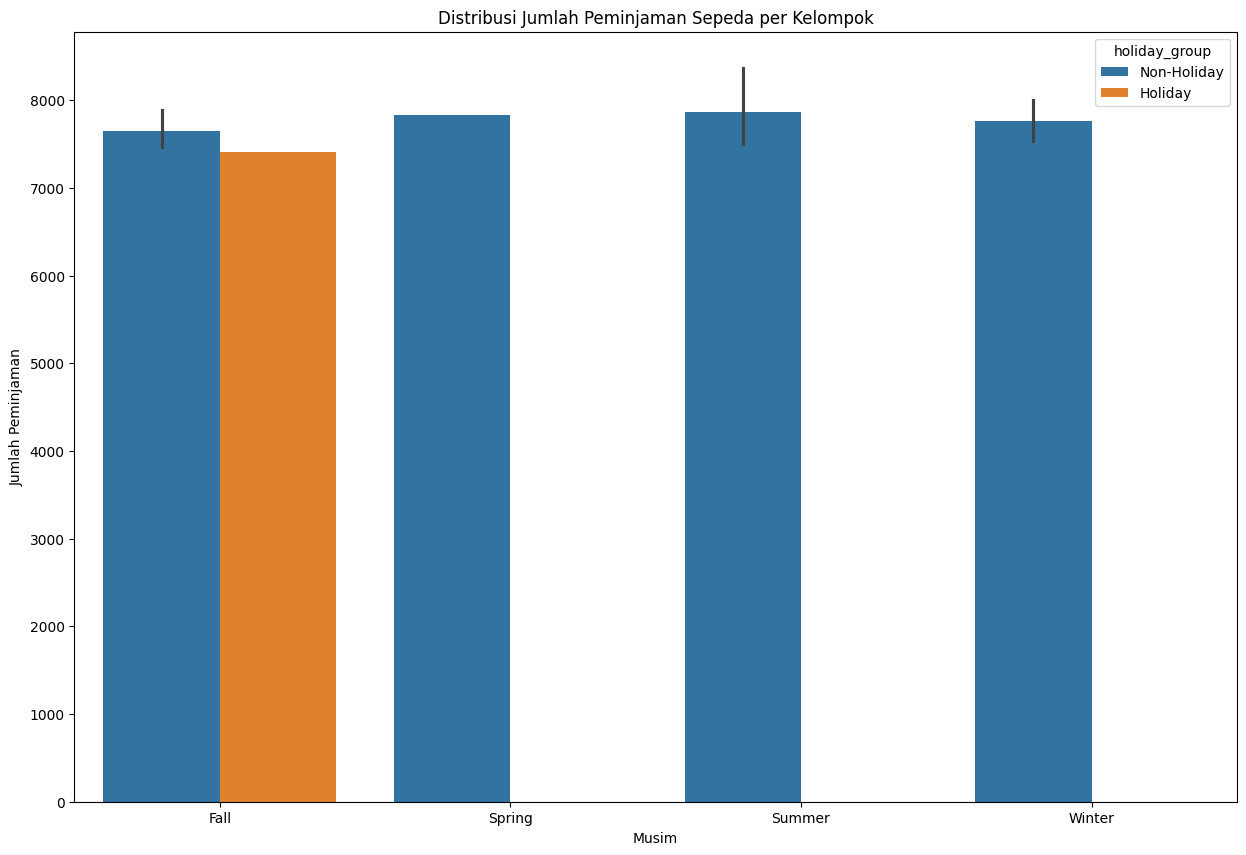

In [30]:
plt.figure(figsize=(15, 10))

# Bar plot untuk distribusi jumlah peminjaman sepeda per kelompok
sns.barplot(x='season_group', y='cnt', hue='holiday_group', data=grouped_data)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Kelompok')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')

plt.show()

In [31]:
# data hours_df
high_rental_hours = hours_df.copy()

high_rental_hours.loc[:, 'season_group'] = high_rental_hours['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
high_rental_hours.loc[:, 'holiday_group'] = high_rental_hours['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
high_rental_hours.loc[:, 'workingday_group'] = high_rental_hours['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
high_rental_hours.loc[:, 'weathersit_group'] = high_rental_hours['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

# Mengelompokkan data berdasarkan faktor-faktor tertentu
grouped_hours_data = high_rental_hours.groupby(['season_group', 'holiday_group', 'workingday_group', 'weathersit_group'])['cnt'].mean().reset_index()

grouped_hours_data

<ipython-input-31-acd9e2499cc3>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hours_data = high_rental_hours.groupby(['season_group', 'holiday_group', 'workingday_group', 'weathersit_group'])['cnt'].mean().reset_index()


,season_group,holiday_group,workingday_group,weathersit_group,cnt
0,Spring,Non-Holiday,Non-Working Day,Clear,110.890951
1,Spring,Non-Holiday,Non-Working Day,Mist,79.427711
2,Spring,Non-Holiday,Non-Working Day,Light Rain,43.674157
3,Spring,Non-Holiday,Non-Working Day,Heavy Rain,23.000000
4,Spring,Non-Holiday,Working Day,Clear,128.938740
...,...,...,...,...,...
59,Winter,Holiday,Non-Working Day,Heavy Rain,NaN
60,Winter,Holiday,Working Day,Clear,NaN
61,Winter,Holiday,Working Day,Mist,NaN
62,Winter,Holiday,Working Day,Light Rain,NaN


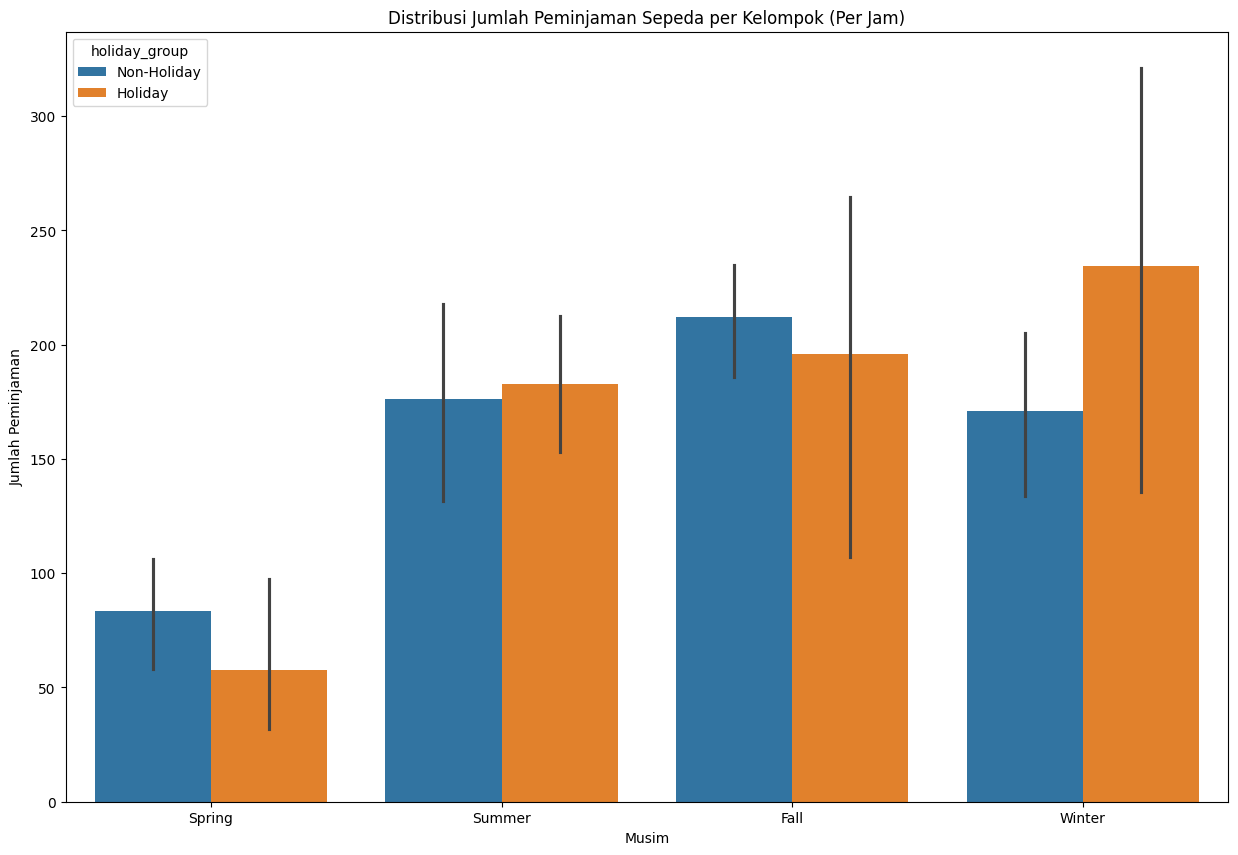

In [32]:
plt.figure(figsize=(15, 10))

# Bar plot untuk distribusi jumlah peminjaman sepeda per kelompok
sns.barplot(x='season_group', y='cnt', hue='holiday_group', data=grouped_hours_data)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Kelompok (Per Jam)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')

plt.show()

- Conclution Pertanyaan 1: **Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda harian?**

  - **Kondisi Cuaca yang Baik Meningkatkan Jumlah Peminjaman:** Visualisasi menunjukkan bahwa jumlah peminjaman sepeda tertinggi terjadi pada kondisi cuaca cerah atau sedikit awan (`weathersit == 1`), dengan distribusi yang lebih tinggi dibandingkan kondisi cuaca lainnya. Hal ini sesuai dengan analisis statistik deskriptif yang menunjukkan rata-rata jumlah peminjaman tertinggi pada kondisi cuaca baik. Sementara itu, kondisi cuaca buruk seperti hujan lebat (`weathersit == 3`) memiliki jumlah peminjaman yang jauh lebih rendah, menunjukkan bahwa orang cenderung tidak meminjam sepeda ketika cuaca buruk.

  - **Suhu Memiliki Pengaruh Positif yang Kuat:** Heatmap korelasi menunjukkan koefisien korelasi positif yang kuat antara suhu (`temp`) dan jumlah peminjaman sepeda (`cnt`). Ini berarti semakin tinggi suhu, semakin banyak orang yang meminjam sepeda.

  - **Kecepatan Angin Memiliki Pengaruh Negatif yang Sedang:** Heatmap korelasi juga menunjukkan koefisien korelasi negatif antara kecepatan angin (`windspeed`) dan jumlah peminjaman sepeda (`cnt`). Meskipun pengaruhnya tidak sekuat suhu, kecepatan angin yang lebih tinggi cenderung mengurangi jumlah peminjaman sepeda.

  - **Kelembaban Memiliki Pengaruh Negatif yang Lemah:** Walaupun heatmap korelasi menunjukkan koefisien korelasi negatif antara kelembaban (`hum`) dan jumlah peminjaman sepeda (`cnt`), pengaruhnya relatif kecil.

  - **Binning of Daily Rental Counts:** Binning menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman sepeda yang termasuk dalam kategori "Medium" dan "High". Hanya sedikit hari yang memiliki jumlah peminjaman sepeda yang termasuk dalam kategori "Low". Hal ini menunjukkan bahwa meskipun ada variasi dalam jumlah peminjaman sepeda harian, secara umum jumlah peminjaman sepeda cenderung tinggi.

- Conclution Pertanyaan 2: **Bagaimana karakteristik hari dengan jumlah peminjaman sepeda harian tinggi berdasarkan data harian dan bagaimana pola peminjaman sepeda dalam jam-jam tertentu pada hari-hari tersebut berdasarkan data per jam?**

  - **Karakteristik Hari dengan Jumlah Peminjaman Tinggi:** Visualisasi menunjukkan bahwa hari-hari dengan jumlah peminjaman sepeda tinggi biasanya terjadi pada musim panas (`season == 3`), bukan hari libur (`holiday == 0`), hari kerja (`workingday == 1`), kondisi cuaca baik (`weathersit == 1`), suhu udara (`temp`) dan suhu yang dirasakan (`atemp`) tinggi, kelembaban rendah, dan kecepatan angin lemah. Adaptasi RFM Analysis juga mendukung hal ini, dengan menunjukkan bahwa hari-hari dengan karakteristik tersebut cenderung memiliki frekuensi dan nilai moneter yang lebih tinggi.

  - **Pola Peminjaman Dalam Sehari:** Pada line plot pola peminjaman per jam menunjukkan bahwa pada hari-hari dengan jumlah peminjaman tinggi, jumlah peminjaman sepeda cenderung meningkat pada jam-jam tertentu, seperti saat jam pulang kerja (sekitar jam 17 hingga 19) atau waktu-waktu rekreasi lainnya. RFM Analysis juga mendukung hal ini dengan menunjukkan bahwa jam-jam tersebut cenderung memiliki frekuensi dan nilai moneter yang lebih tinggi.

In [33]:
days_df.to_csv('/content/drive/MyDrive/Dataset/Bike-Sharing/day.csv', index=False)
hours_df.to_csv('/content/drive/MyDrive/Dataset/Bike-Sharing/hour.csv', index=False)